<a href="https://colab.research.google.com/github/w1834002/FYP_Prototype_w1834002/blob/main/w1834002_prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow

In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the columns with the count of missing values
print(missing_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Create new columns for the scaled versions
df['time_scaled'] = scaler.fit_transform(df[['Time']])
df['amount_scaled'] = scaler.fit_transform(df[['Amount']])

In [ ]:
# Drop the original 'time' and 'amount' columns
df.drop(['Time', 'Amount'], axis=1, inplace=True)

df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,time_scaled,amount_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,1.641931,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,1.641952,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,1.641974,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,1.641974,-0.313249


In [ ]:
# Calculate the total number of each class
class_counts_number = df['Class'].value_counts()

print(f"No Frauds: {class_counts_number[0]} transactions")
print(f"Frauds: {class_counts_number[1]} transactions")

No Frauds: 284315 transactions
Frauds: 492 transactions


In [ ]:
# Calculate the percentage of each class
class_counts_percentage = df['Class'].value_counts(normalize=True) * 100

print(f"No Frauds: {class_counts_percentage[0]:.2f}% of the dataset")
print(f"Frauds: {class_counts_percentage[1]:.2f}% of the dataset")

No Frauds: 99.83% of the dataset
Frauds: 0.17% of the dataset


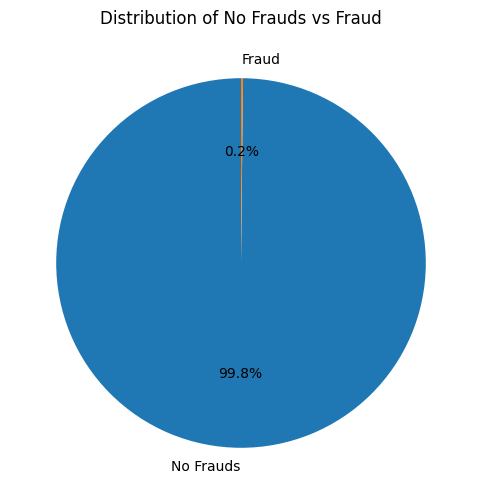

In [ ]:
import matplotlib.pyplot as plt

# Labels for the classes
labels = ['No Frauds' if index == 0 else 'Fraud' for index in class_counts_percentage.index]

#Plotting
plt.figure(figsize=(8, 6))
plt.pie(class_counts_percentage, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of No Frauds vs Fraud')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline

# Separate input features and target variable
X = df.drop('Class', axis=1)  # Input features
y = df['Class']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline with SMOTE for oversampling followed by Random Undersampling
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.1)),
    ('random_under', RandomUnderSampler(sampling_strategy=0.5))
])

# Apply the pipeline to the training data
X_train_balanced, y_train_balanced = pipeline.fit_resample(X_train, y_train)

In [ ]:
# Checking the class distribution after applying the combination
print("After applying SMOTE and Random Undersampling, counts of label '1': {}".format(sum(y_train_balanced == 1)))
print("After applying SMOTE and Random Undersampling, counts of label '0': {}".format(sum(y_train_balanced == 0)))

# Calculate the percentage of each class
class_percentage_balanced = y_train_balanced.value_counts(normalize=True) * 100

print(f"\nNo Frauds: {class_percentage_balanced[0]:.2f}% of the dataset")
print(f"Frauds: {class_percentage_balanced[1]:.2f}% of the dataset")

After applying SMOTE and Random Undersampling, counts of label '1': 22745
After applying SMOTE and Random Undersampling, counts of label '0': 45490

No Frauds: 66.67% of the dataset
Frauds: 33.33% of the dataset


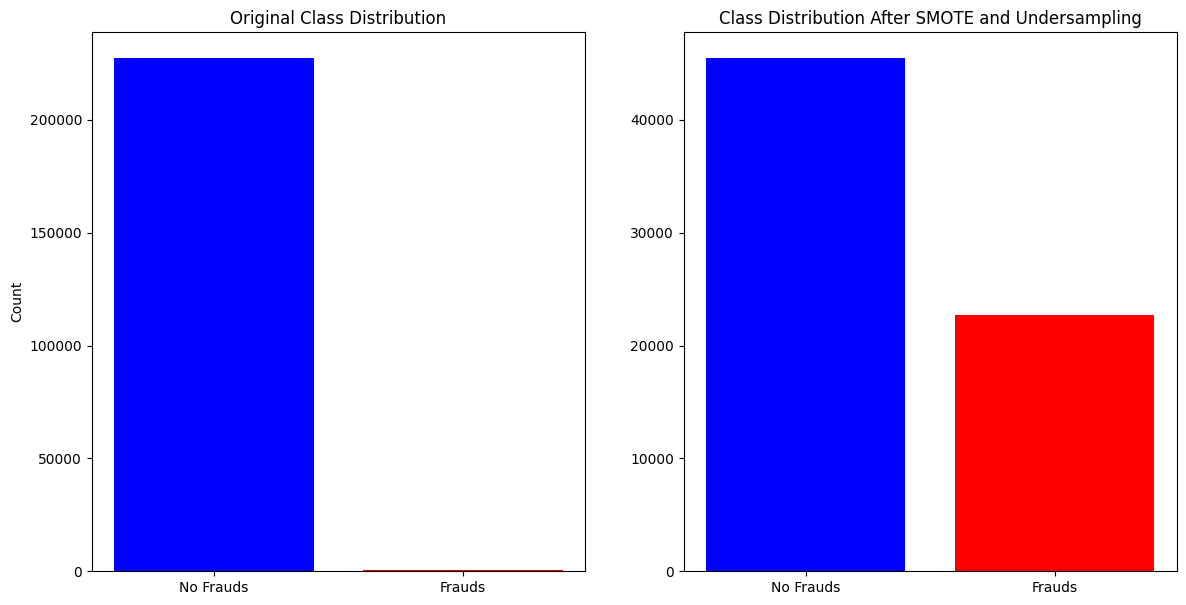

In [ ]:
# Calculate the class distribution after resampling
original_class_distribution = y_train.value_counts()
new_class_distribution = y_train_balanced.value_counts()

# Setting up the figure and axes for the subplot
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Original class distribution plot
ax[0].bar(original_class_distribution.index, original_class_distribution.values, color=['blue', 'red'])
ax[0].set_title('Original Class Distribution')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['No Frauds', 'Frauds'])
ax[0].set_ylabel('Count')

# Class distribution after SMOTE plot
ax[1].bar(new_class_distribution.index, new_class_distribution.values, color=['blue', 'red'])
ax[1].set_title('Class Distribution After SMOTE and Undersampling')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['No Frauds', 'Frauds'])

# Display the plots
plt.show()

In [ ]:
#from sklearn.neural_network import MLPClassifier
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import make_scorer, precision_score

# Define your model
#mlp = MLPClassifier(max_iter=100)

# Define the grid of parameters to search over
#param_grid = {
#    'hidden_layer_sizes': [(50,), (100,), (50,50), (100,50), (50,100)],  # Examples of different layer sizes
#    'activation': ['tanh', 'relu'],  # Activation functions to try
#    'solver': ['sgd', 'adam'],  # Optimization algorithms
#    'alpha': [0.0001, 0.05],  # L2 penalty (regularization term) parameter
#    'learning_rate': ['constant','adaptive'],  # Learning rate schedule
#}

# Define your custom scorer if needed, here we are using precision
#precision_scorer = make_scorer(precision_score, zero_division=0)

# Create GridSearchCV
#grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=-1, cv=3, scoring=precision_scorer)

# Fit the grid search to the data
#grid_search.fit(X_train_balanced, y_train_balanced)

# Print the best parameters and the precision for those parameters
#print("Best parameters found: ", grid_search.best_params_)
#print("Best precision found: ", grid_search.best_score_)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_balanced.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_balanced, y_train_balanced, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy  = model.evaluate(X_test, y_test)
print(f'test loss: {loss}, test accuracy: {accuracy}')

#


Epoch 1/20
2133/2133 [==============================] - 7s 2ms/step - loss: 0.0584 - accuracy: 0.9786 - val_loss: 0.0150 - val_accuracy: 0.9961
Epoch 2/20
2133/2133 [==============================] - 5s 2ms/step - loss: 0.0151 - accuracy: 0.9960 - val_loss: 0.0140 - val_accuracy: 0.9966
Epoch 3/20
2133/2133 [==============================] - 6s 3ms/step - loss: 0.0101 - accuracy: 0.9972 - val_loss: 0.0166 - val_accuracy: 0.9958
Epoch 4/20
2133/2133 [==============================] - 5s 2ms/step - loss: 0.0085 - accuracy: 0.9981 - val_loss: 0.0106 - val_accuracy: 0.9983
Epoch 5/20
2133/2133 [==============================] - 5s 2ms/step - loss: 0.0075 - accuracy: 0.9982 - val_loss: 0.0109 - val_accuracy: 0.9980
Epoch 6/20
2133/2133 [==============================] - 4s 2ms/step - loss: 0.0059 - accuracy: 0.9986 - val_loss: 0.0125 - val_accuracy: 0.9972
Epoch 7/20
2133/2133 [==============================] - 4s 2ms/step - loss: 0.0059 - accuracy: 0.9985 - val_loss: 0.0104 - val_accuracy:

1781/1781 [==============================] - 3s 1ms/step
Neural Network:
---------------
Accuracy: 0.9986
Precision: 0.5526
Recall: 0.8571


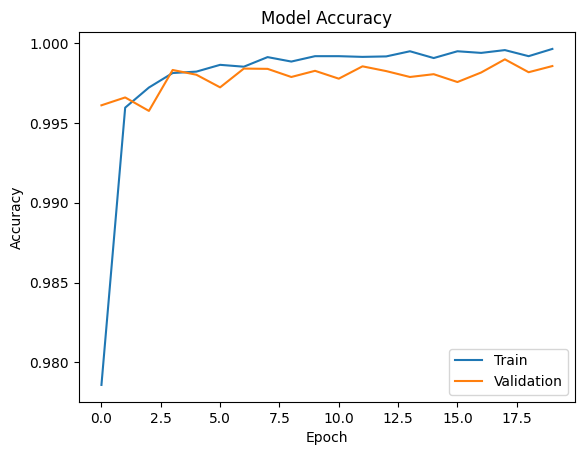

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Making predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Converting probabilities to class labels (0 or 1)

#for i in y_pred_classes:
#  print(i)

# Evaluating the model
accuracy_nn = accuracy_score(y_test, y_pred_classes)
precision_nn = precision_score(y_test, y_pred_classes)
recall_nn = recall_score(y_test, y_pred_classes)

print("Neural Network:\n" + "-" * 15)
print(f"Accuracy: {accuracy_nn:.4f}")
print(f"Precision: {precision_nn:.4f}")
print(f"Recall: {recall_nn:.4f}")

# Optional: Plot training history for loss and accuracy
#print(history.history)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the balanced training data
clf.fit(X_train_balanced, y_train_balanced)

# Predict on the test data
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the classifier
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)

print("Random Forest classifier:\n" + "-" * 15)
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")

Random Forest classifier:
---------------
Accuracy: 0.9994
Precision: 0.7699
Recall: 0.8878


In [ ]:
# Determine which model performs best for each metric
best_accuracy = "Random Forest" if accuracy_rf > accuracy_nn else "Neural Network"
best_precision = "Random Forest" if precision_rf > precision_nn else "Neural Network"
best_recall = "Random Forest" if recall_rf > recall_nn else "Neural Network"

# Print comparison
print(f"For Random Forest: \nThe Accuracy is: {accuracy_rf:.4f}, \nThe Precision is: {precision_rf:.4f}, \nThe Recall is: {recall_rf:.4f}.\n")
print(f"\nFor Neural Network: \nThe Accuracy is: {accuracy_nn:.4f}, \nThe Precision is: {precision_nn:.4f}, \nThe Recall is: {recall_nn:.4f}.\n")
print(f"\nThe Accuracy is Higher for {best_accuracy}, The Precision is Higher for {best_precision}, The Recall is Higher for {best_recall}.\n")

For Random Forest: 
The Accuracy is: 0.9994, 
The Precision is: 0.7699, 
The Recall is: 0.8878.


For Neural Network: 
The Accuracy is: 0.9986, 
The Precision is: 0.5526, 
The Recall is: 0.8571.


The Accuracy is Higher for Random Forest, The Precision is Higher for Random Forest, The Recall is Higher for Random Forest.

